!pip install yfinance

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

### JPMorgan Simulation

#### Drift is the direction that rates of returns have had in the past. It is the expected return of the stock. We could calculate the drift using the formula below:

$$ drift = u - \frac{1}{2} * var $$

In [2]:
def Monte_carlo_pre(stock_name, start_date, end_date):
    stock_data = yf.download(stock_name, start_date, end_date, interval="1d")  # download data from Yahoo Finance
    stock_data = stock_data['Close']
    stock_log_returns = np.log(1+stock_data.pct_change())  # convert to log return

    stock_data.plot(figsize=(15,6))  # Stock price plot
    plt.title(stock_name+' Stock Price from '+start_date+ ' to ' +end_date)
    
    u = stock_log_returns.mean()  # Calculate drift
    var = stock_log_returns.var()
    drift = u - (0.5*var)
    stddev = stock_log_returns.std()
    
    t_intervals = 365  # simulation param
    iterations = 1000
    
    daily_returns = np.exp(drift + stddev * norm.ppf(np.random.rand(t_intervals,iterations))) # set up simulation
    
    price_list = np.zeros_like(daily_returns)  # Calculate stock prices
    price_list[0] = S0 = stock_data[-1]

    for t in range(1,t_intervals):
        price_list[t] = price_list[t-1]*daily_returns[t]
    
    # Calculate evaluation metrics MAE and MSE
    actual_prices = yf.download(stock_name, "2018-01-01", "2018-12-31", interval="1d")
    actual_prices = actual_prices['Close']

    predicted_prices = price_list[-1][:len(actual_prices)]
    print(len(predicted_prices))
    mae = np.mean(np.abs(predicted_prices - actual_prices))
    mse = np.mean((predicted_prices - actual_prices)**2)
    print('MAE: ', mae)
    print('MSE: ', mse)
    
    plt.figure(figsize=(15,6))  # 10 of predicted prices plot
    plt.plot(pd.DataFrame(price_list).iloc[:,0:10])
    plt.title(stock_name+' Monte Carlo Prediction')
    plt.show()
    
    plt.figure(figsize=(15,6))  # predicted price range in 't_interval' days
    plt.hist(pd.DataFrame(price_list).iloc[-1],bins=30)
    plt.title(stock_name+' Price Prediction in 365 days')
    plt.xlabel("Price after 365 days")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
250
MAE:  32.20731521478869
MSE:  1796.4526934575936


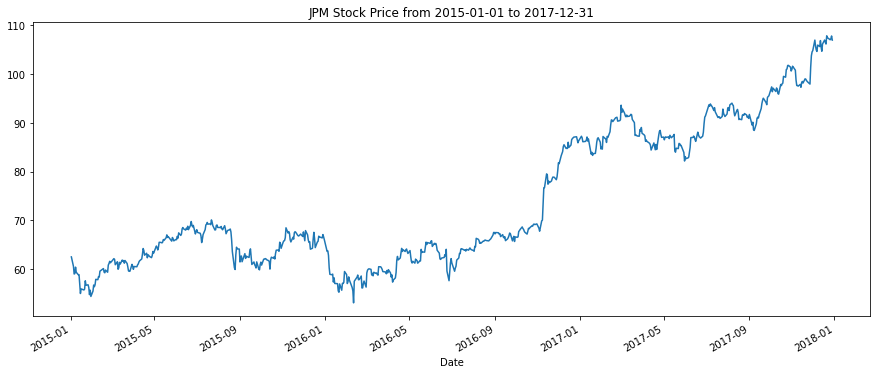

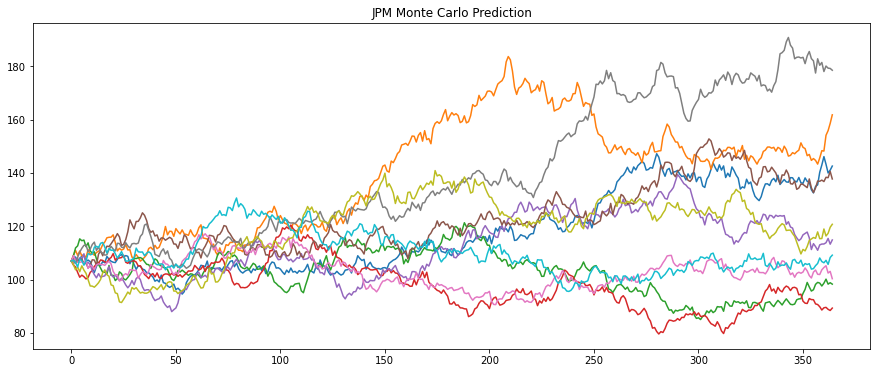

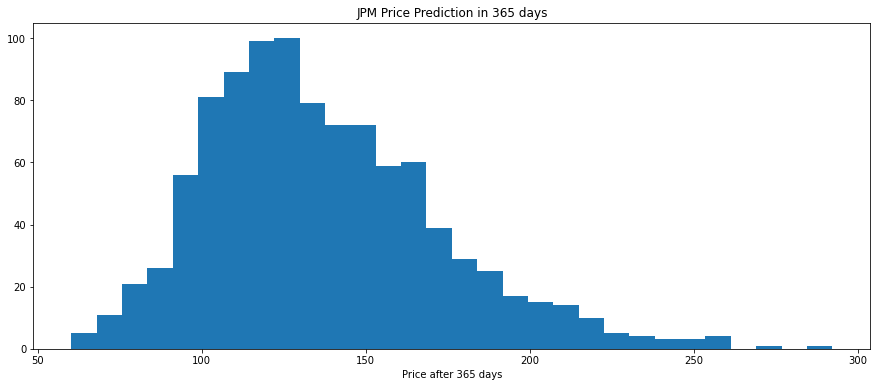

In [3]:
Monte_carlo_pre('JPM','2015-01-01','2017-12-31')

### Citi Simulation

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
250
MAE:  24.59236197266126
MSE:  1155.3940432394058


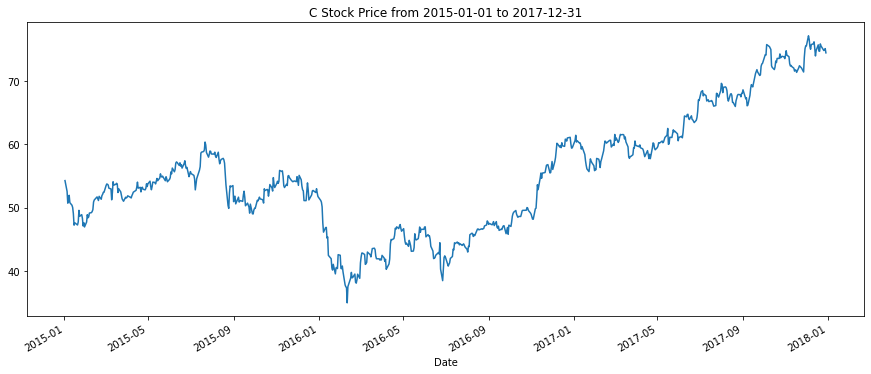

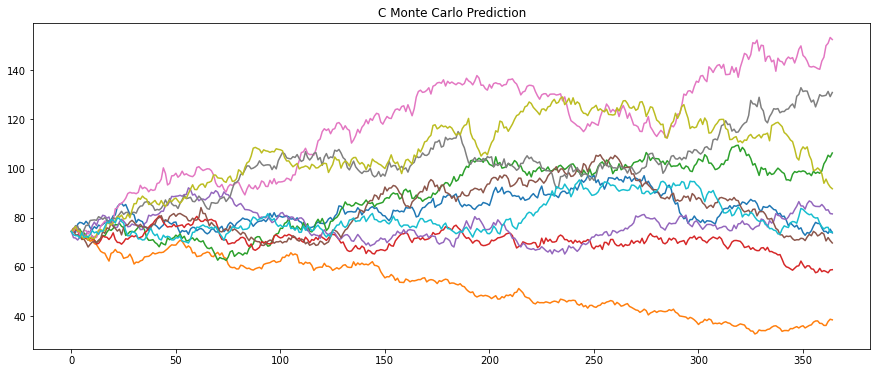

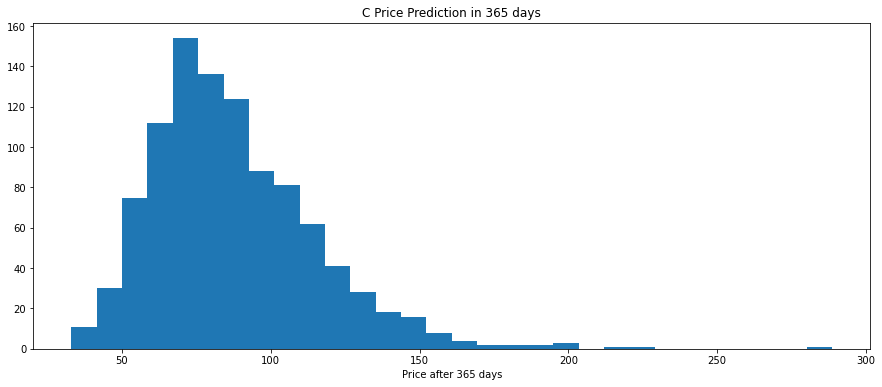

In [4]:
Monte_carlo_pre('C','2015-01-01','2017-12-31')

### Bank of America Simulation

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
250
MAE:  10.385267493590343
MSE:  194.5070419888502


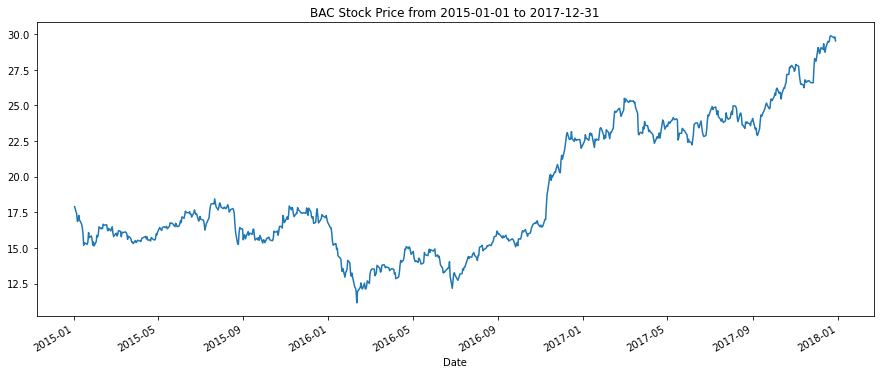

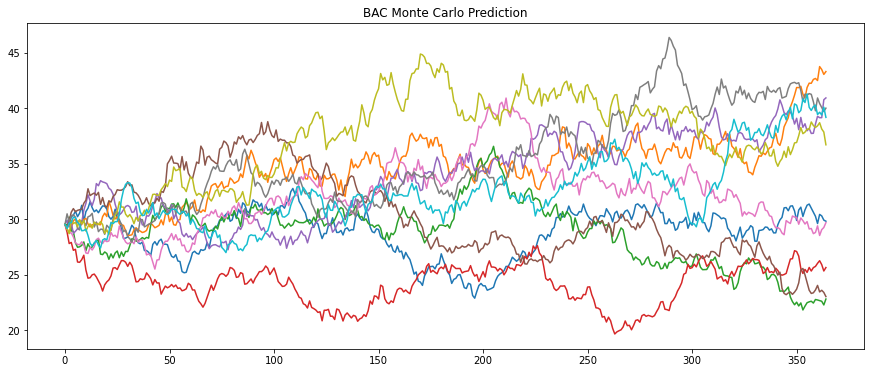

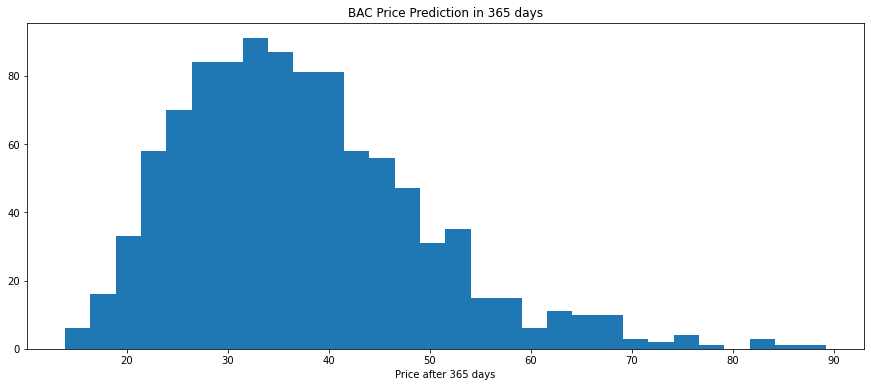

In [5]:
Monte_carlo_pre('BAC','2015-01-01','2017-12-31')

### Wells Fargo Simulation

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
250
MAE:  14.209478517136782
MSE:  349.3712234075165


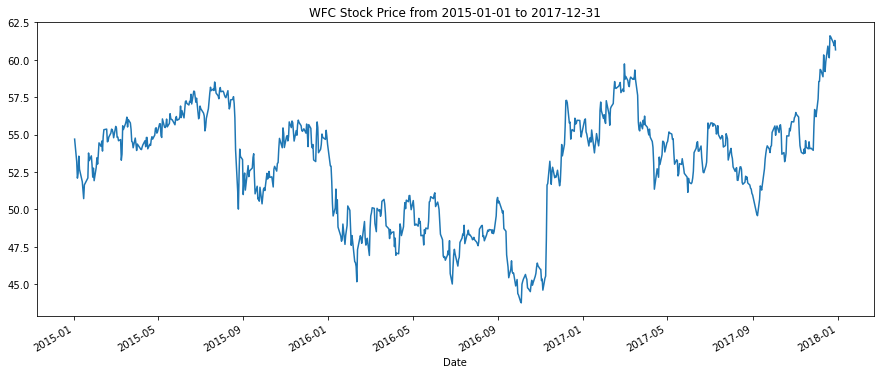

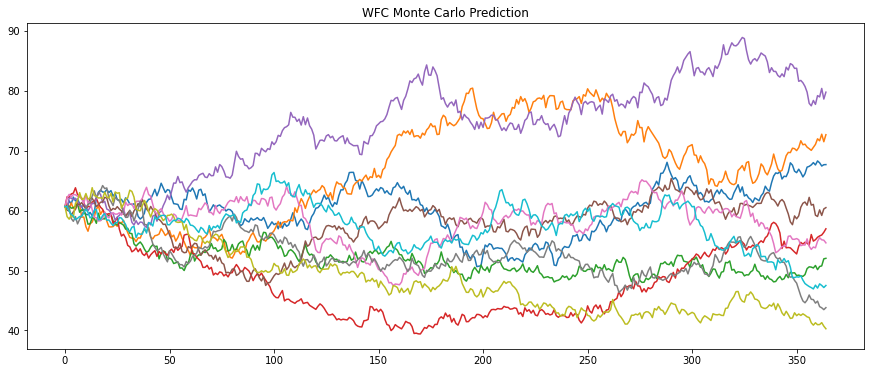

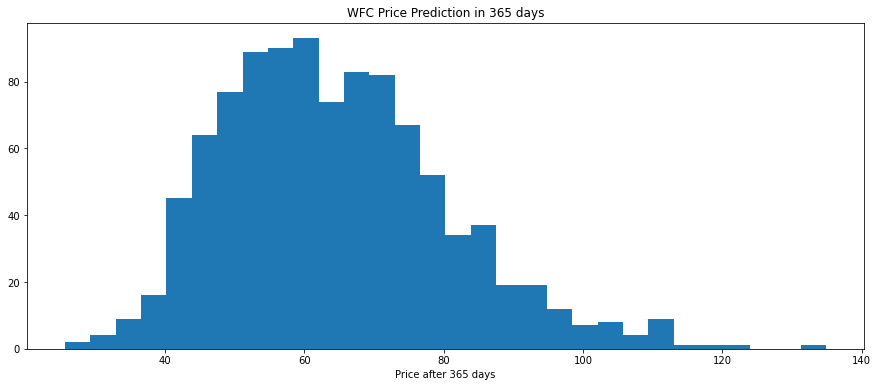

In [6]:
Monte_carlo_pre('WFC','2015-01-01','2017-12-31')

### Apple Simulation

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
250
MAE:  12.03639420488475
MSE:  250.14984837818702


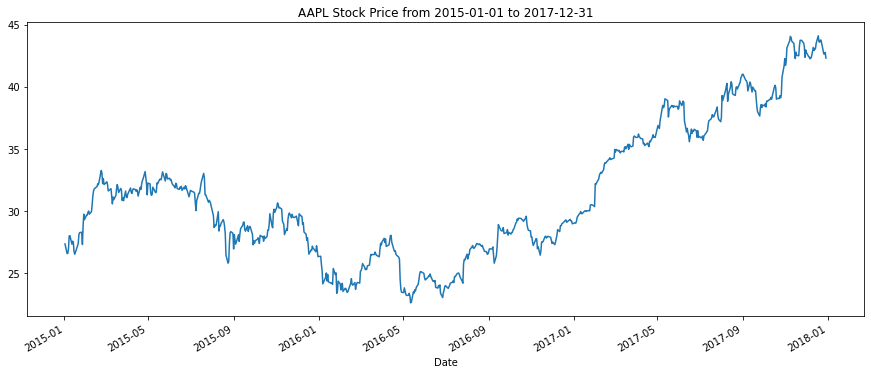

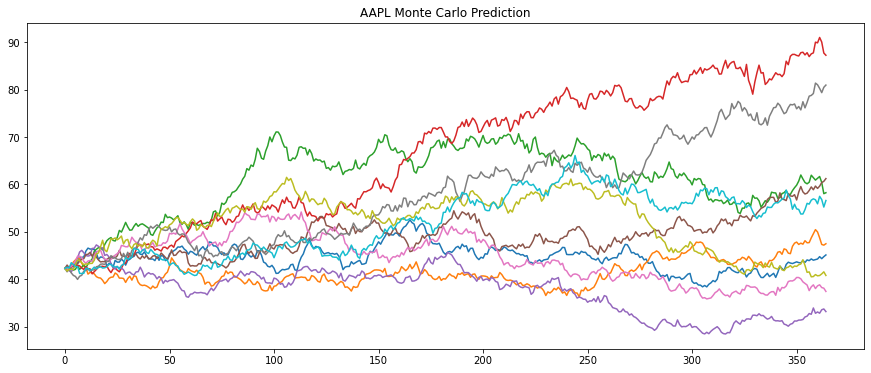

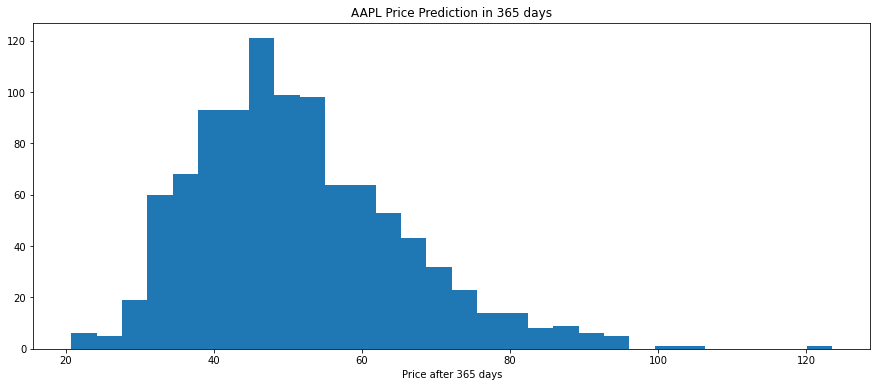

In [7]:
Monte_carlo_pre('AAPL','2015-01-01','2017-12-31')

### Meta Simulation

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
250
MAE:  94.86021574751652
MSE:  14742.728351321592


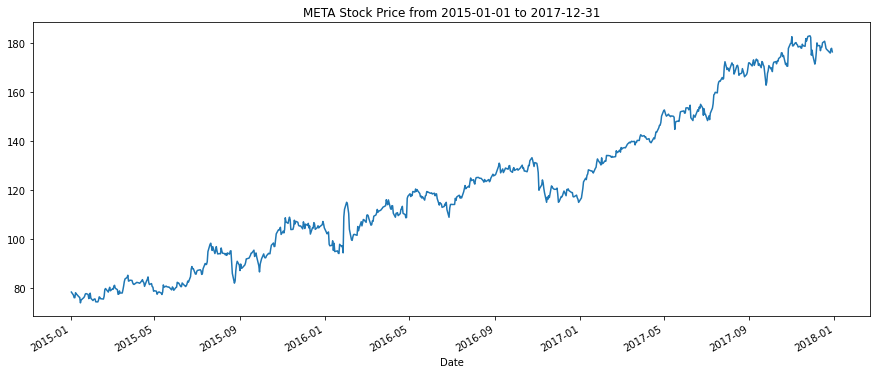

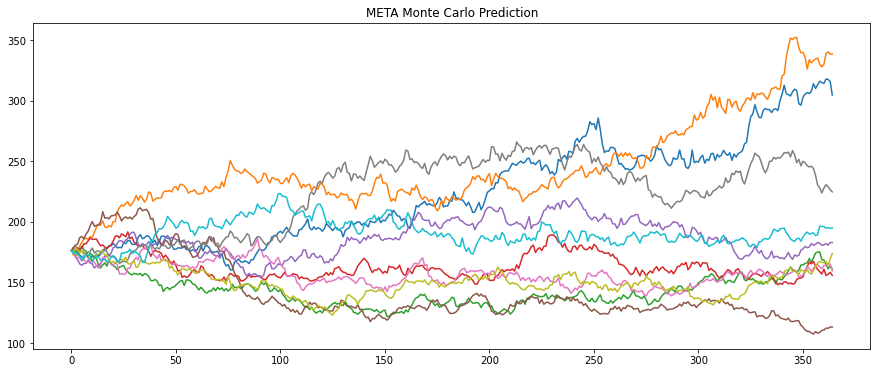

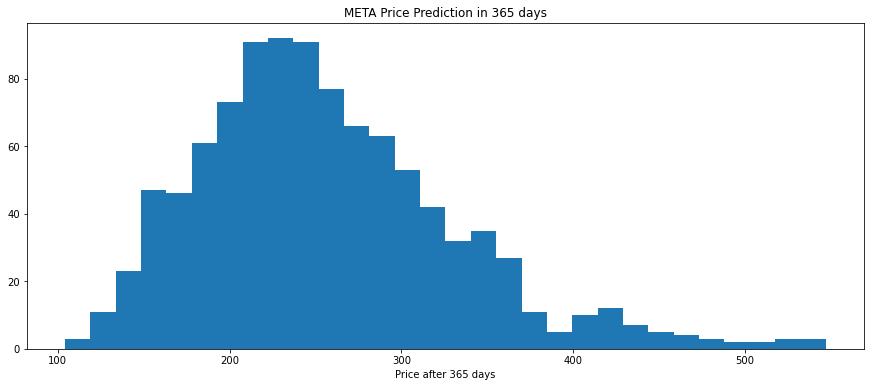

In [8]:
Monte_carlo_pre('META','2015-01-01','2017-12-31')

### Google Simulation

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
250
MAE:  38.94914133210643
MSE:  2776.1814242704445


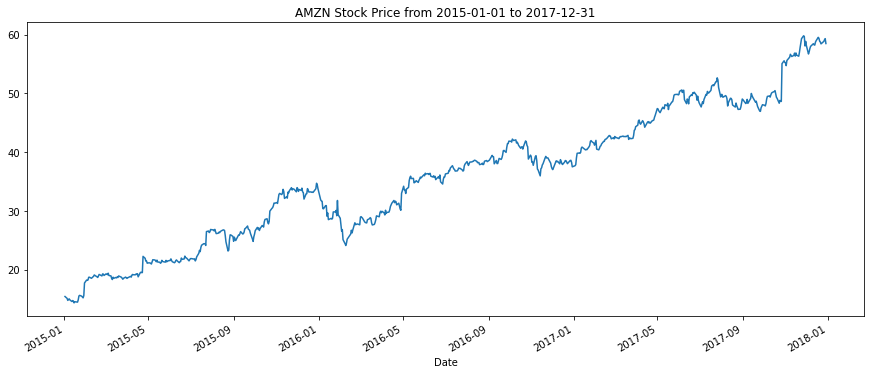

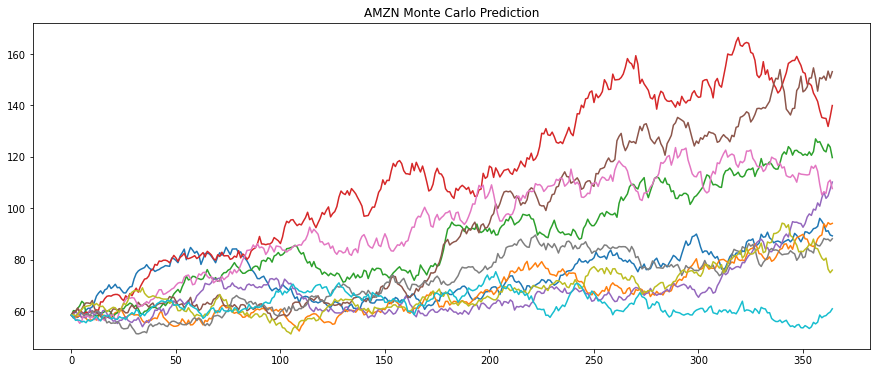

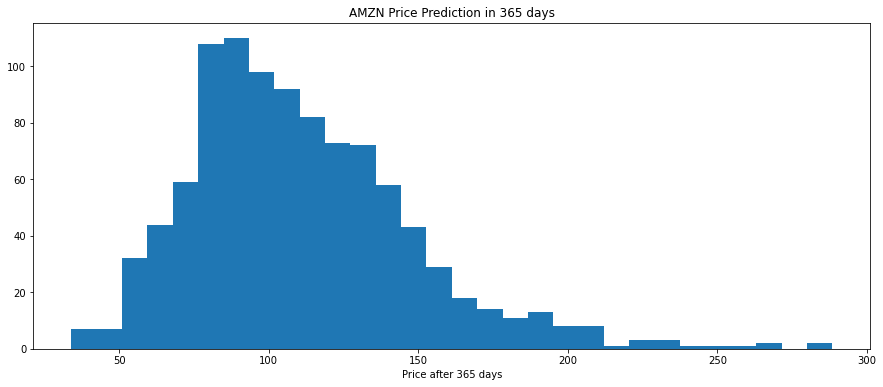

In [9]:
Monte_carlo_pre('AMZN','2015-01-01','2017-12-31')

### Amazon Simulation

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
250
MAE:  18.74719368544867
MSE:  580.788361595679


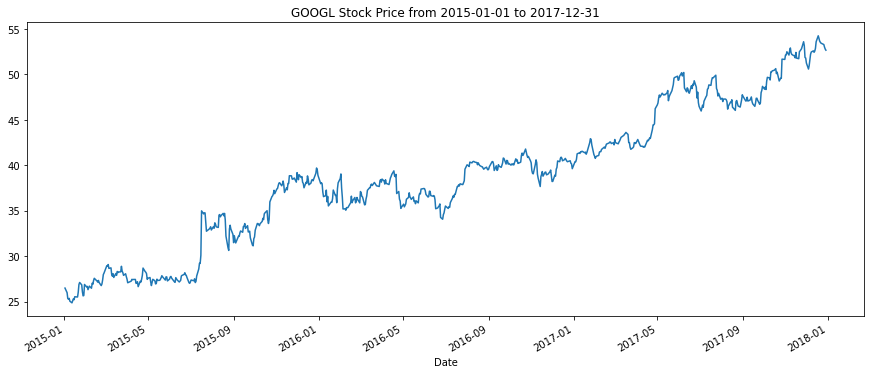

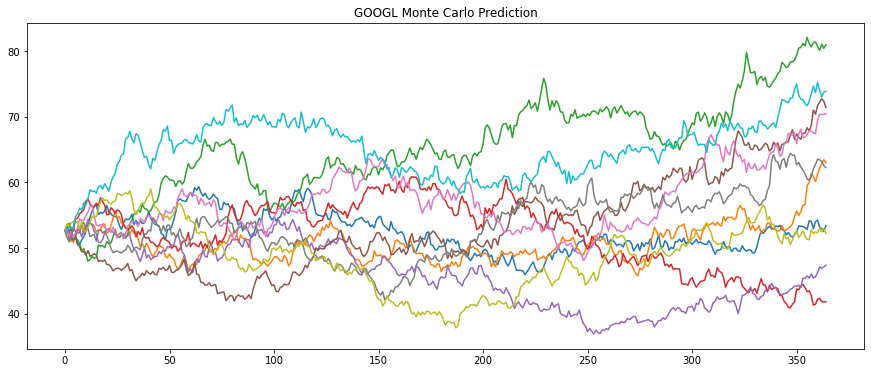

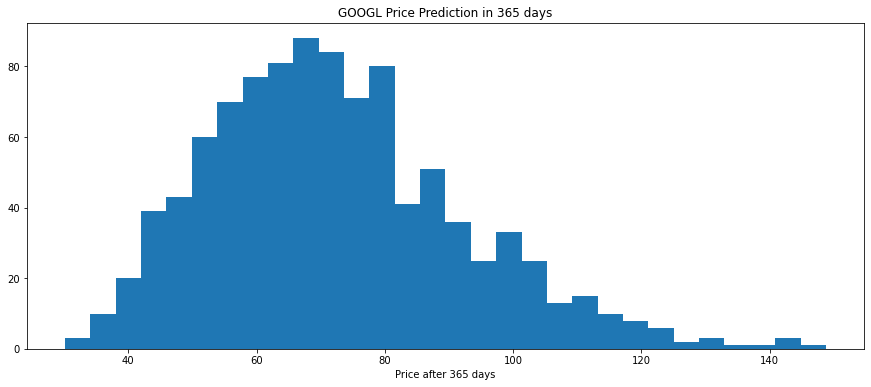

In [10]:
Monte_carlo_pre('GOOGL','2015-01-01','2017-12-31')

### Tesla Simulation

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
250
MAE:  8.0789871368494
MSE:  125.65936543179592


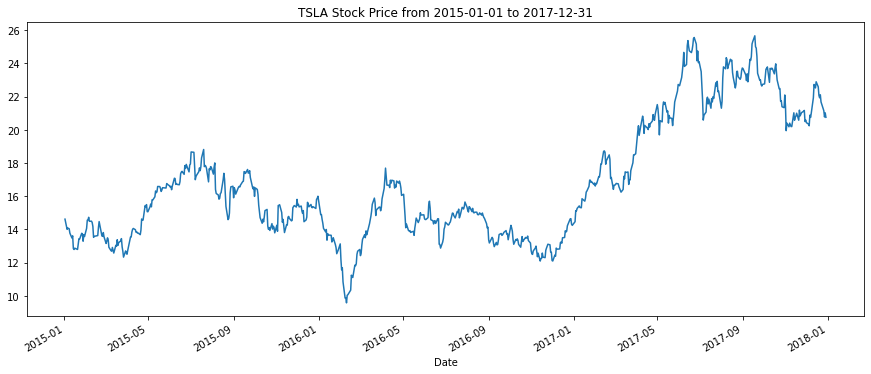

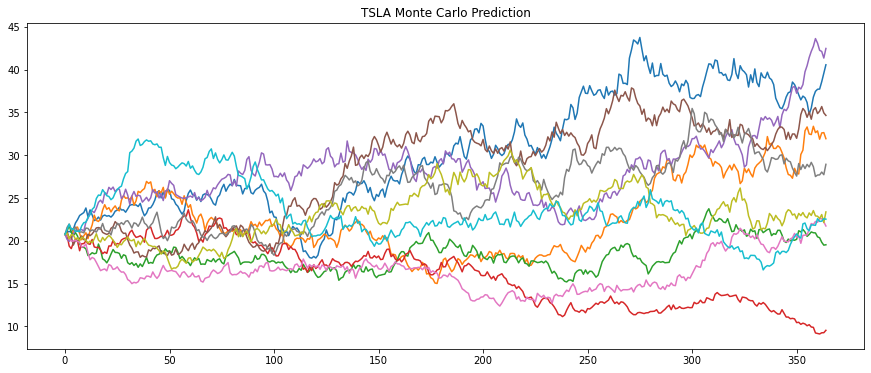

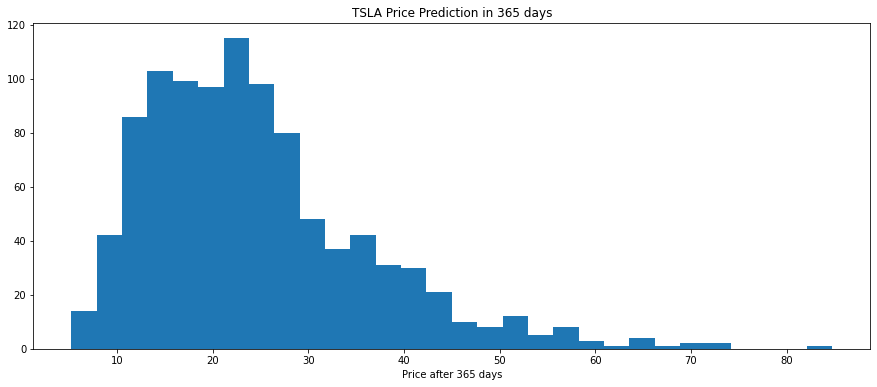

In [11]:
Monte_carlo_pre('TSLA','2015-01-01','2017-12-31')

### Alibaba Simulation

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
250
MAE:  69.09378636340124
MSE:  8815.956857877844


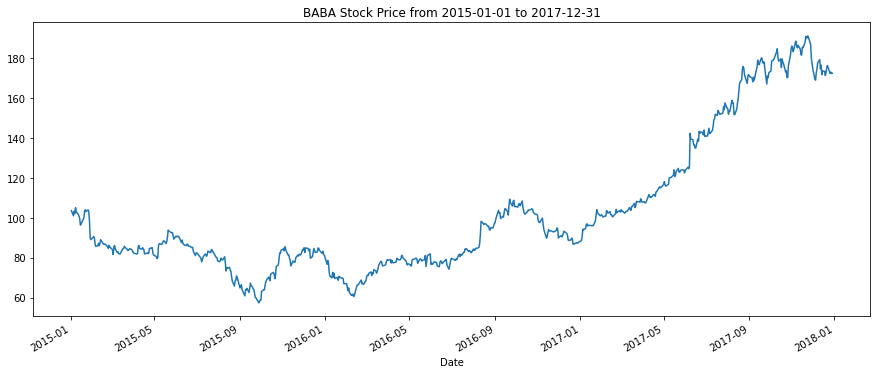

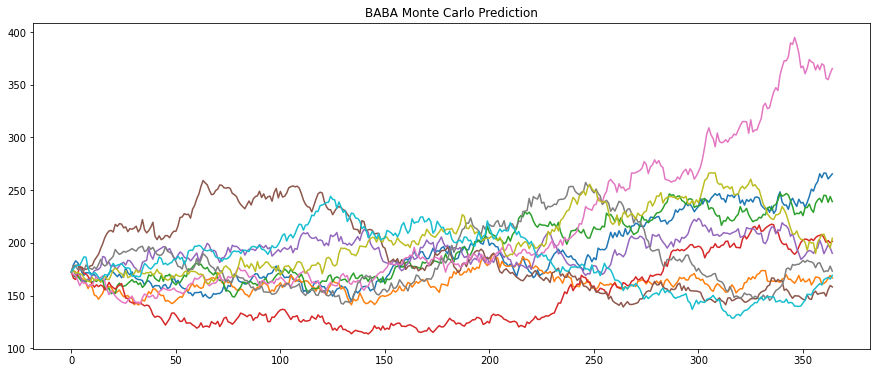

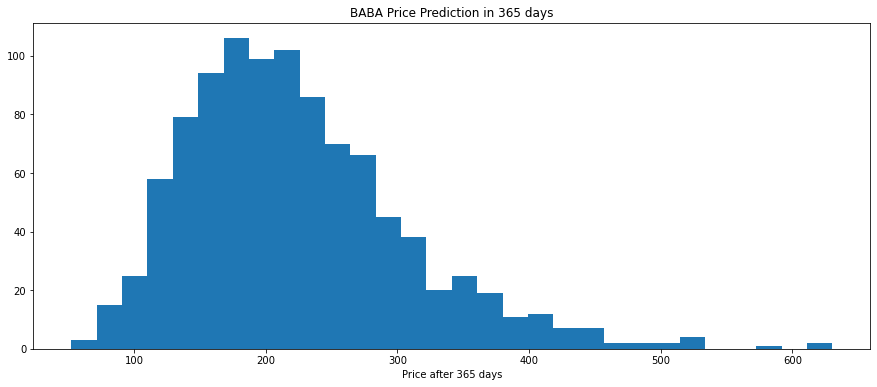

In [12]:
Monte_carlo_pre('BABA','2015-01-01','2017-12-31')